<a href="https://colab.research.google.com/github/Anni-21/Python-Projects/blob/main/Medical%20Data%20Visualizer/Medical_Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1
df = pd.read_csv("https://github.com/Shawwnscott/FreeCodeCamp-Data-Analysis-with-Python/raw/main/Medical%20Data%20Visualizer/medical_examination.csv")

# 2
df['overweight'] = np.where((df["weight"] / np.square(df["height"]/100)) > 25, 1, 0)

# 3
df["cholesterol"] = np.where(df["cholesterol"] == 1, 0, 1)
df["gluc"] = np.where(df["gluc"] == 1, 0, 1)

# 4
def draw_cat_plot():
    # 5
    df_cat = sorted(['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])


    # 6
    df_cat = pd.melt(df, id_vars = ["cardio"], value_vars = df_cat)


    # 7
    figure = sns.catplot(x= "variable", kind ="count" ,hue = "value", data = df_cat, col= "cardio")

    figure.set_axis_labels("variable", "total")

    # 8
    fig = figure


    # 9
    fig.savefig('catplot.png')
    return fig


# 10
def draw_heat_map():
    # 11
    df_heat = df[
        (df['ap_lo'] <= df['ap_hi']) &
        (df['height'] >= df['height'].quantile(0.025)) &
        (df['height'] <= df['height'].quantile(0.975)) &
        (df['weight'] >= df['weight'].quantile(0.025)) &
        (df['weight'] <= df['weight'].quantile(0.975))


    ]

    # 12
    corr = df_heat.corr()

    # 13
    mask = np.triu(np.ones_like(corr, dtype = bool))



    # 14
    fig, ax = plt.subplots(figsize = (12, 12))

    # 15
    sns.heatmap(corr, vmin = 0, vmax = 0.25, fmt = '.1f', linewidth = 1, annot = True, square = True, mask = mask, cbar_kws = {'shrink': .82})



    # 16
    fig.savefig('heatmap.png')
    return fig


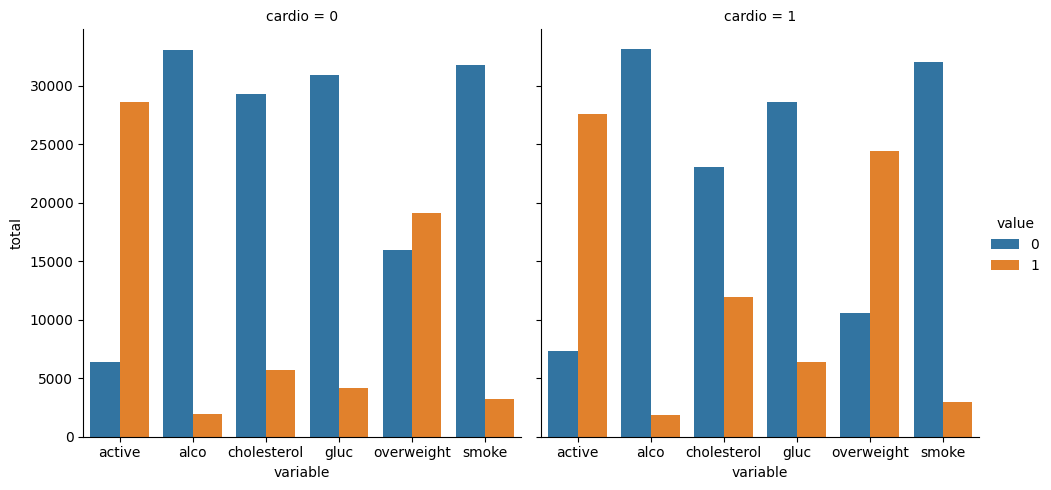

In [ ]:
draw_cat_plot()

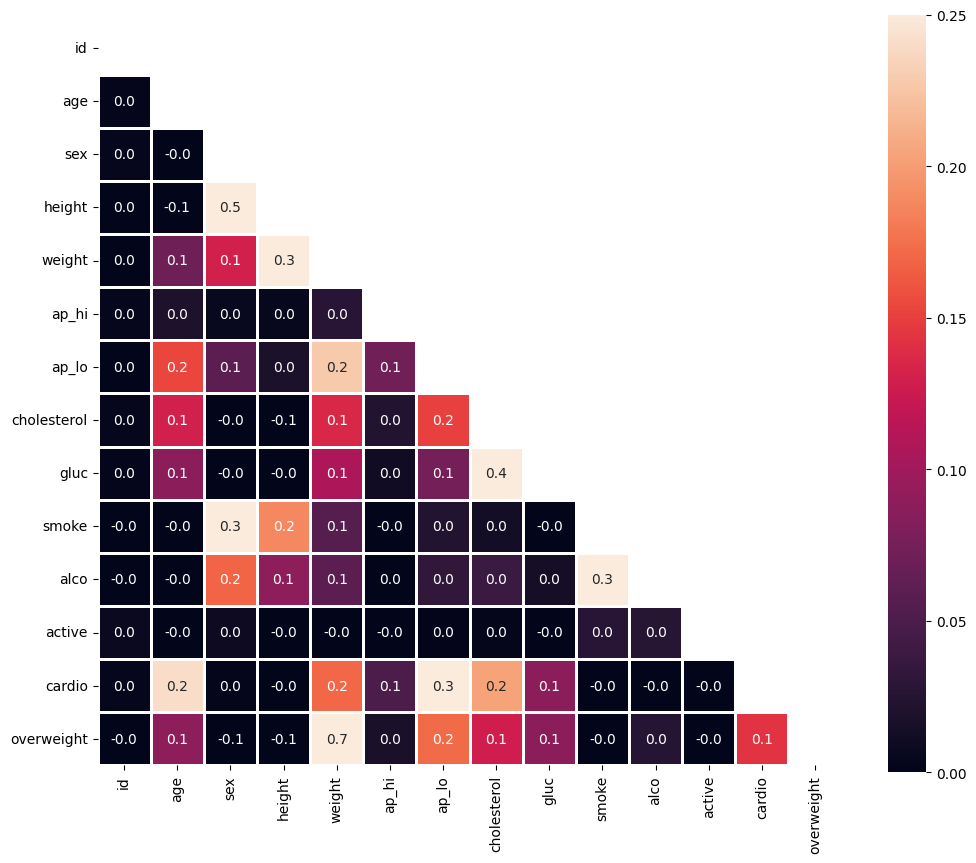

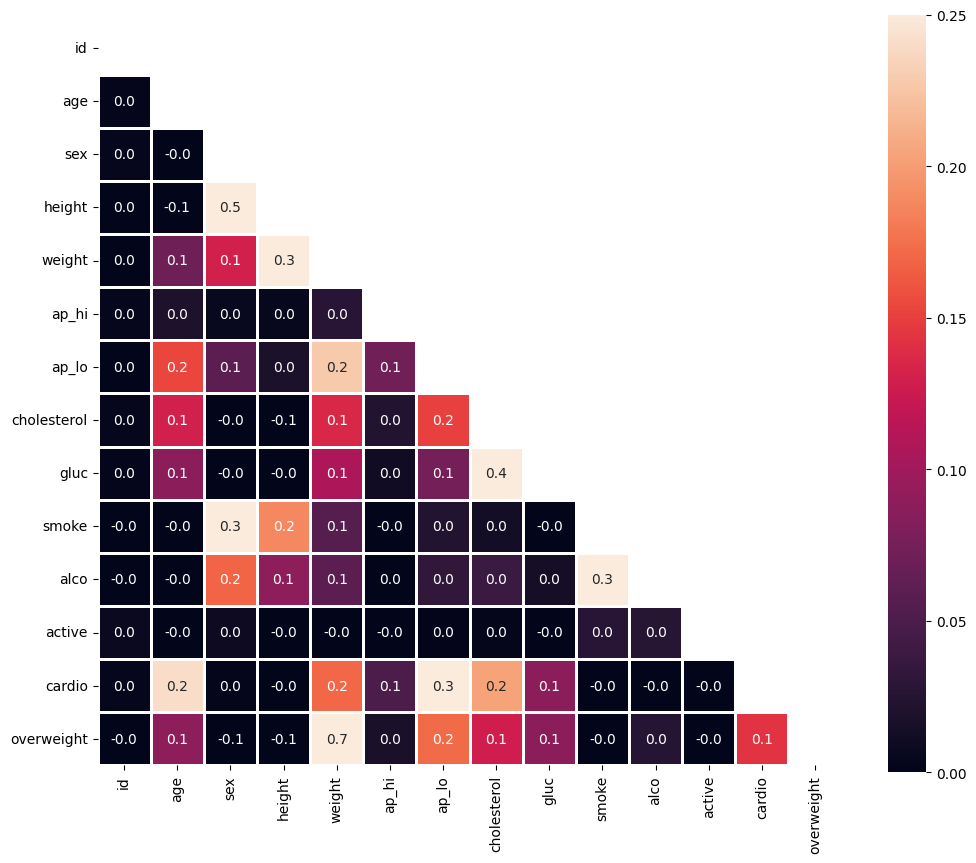

In [ ]:
draw_heat_map()